In [ ]:
!pip install gymnasium
import pygame, math
import numpy as np
from time import sleep
import gymnasium as gym
from gymnasium import Env, spaces, register, make
import random
import warnings
import scipy.stats
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 15.7 MB/s eta 0:00:00
pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


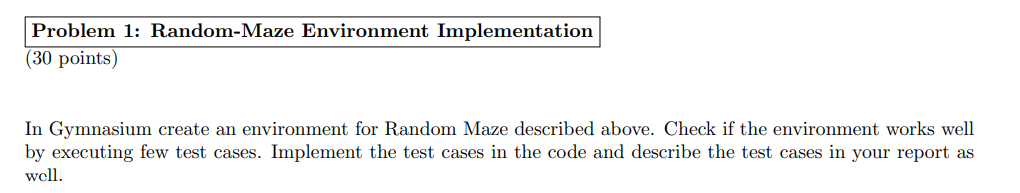

In [ ]:
class RME(Env):

    def __init__(self, seed=69):
        self.P = {
            0:{"Top":[(0.8,0,-0.04,False), (0.1,0,-0.04,False), (0.1,1,-0.04,False)],
               "Right":[(0.8,1,-0.04,False), (0.1,0,-0.04,False), (0.1,4,-0.04,False)],
               "Left":[(0.8,0,-0.04,False), (0.1,0,-0.04,False), (0.1,4,-0.04,False)],
               "Bottom":[(0.8,4,-0.04,False), (0.1,1,-0.04,False),(0.1,0,-0.04,False)]
               },
            1:{"Top":[(0.8,1,-0.04,False),(0.1,2,-0.04,False),(0.1,1,-0.04,False)],
               "Right":[(0.8,2,-0.04,False),(0.1,1,-0.04,False),(0.1,1,-0.04,False)],
               "Left":[(0.8,0,-0.04,False),(0.1,1,-0.04,False),(0.1,1,-0.04,False)],
               "Bottom":[(0.8,1,-0.04,False),(0.1,2,-0.04,False),(0.1,0,-0.04,False)]
               },
            2:{"Top":[(0.8,2,-0.04,False), (0.1,1,-0.04,False),(0.1,3,1,True)],
               "Right":[(0.8,3,1,True),(0.1,2,-0.04,False),(0.1,6,-0.04,False)],
               "Left":[(0.8,1,-0.04,False), (0.1,2,-0.04,False), (0.1,6,-0.04,False)],
               "Bottom":[(0.8,6,-0.04,False),(0.1,1,-0.04,False),(0.1,3,-0.04,True)]
               },
            3:{"Top":[(1,3,0,True)],
               "Right":[(1,3,0,True)],
               "Left":[(1,3,0,True)],
               "Bottom":[(1,3,0,True)]
               },
            4:{"Top":[(0.8,1,-0.04,False),(0.2,4,-0.04,False)],
               "Right":[(0.8,4,-0.04,False),(0.1,0,-0.04,False),(0.1,8,-0.04,False)],
               "Left":[(0.8,4,-0.04,False), (0.1,0,-0.04,False), (0.1,8,-0.04,False)],
               "Bottom":[(0.8,8,-0.04,False),(0.2,4,-0.04,False)]
               },
            5:{"Top":[],
               "Right":[],
               "Left":[],
               "Bottom":[]
               },
            6:{"Top":[(0.8,2,-0.04,False), (0.1,6,-0.04,False), (0.1,7,-1,True)],
               "Right":[(0.8,7,-1,True), (0.1,2,-0.04,False), (0.1,10,-0.04,False)],
               "Left":[(0.8,6,-0.04,False), (0.1,2,-0.04,False), (0.1,10,-0.04,False)],
               "Bottom":[(0.8,10,-0.04,False), (0.1,7,-1,True), (0.1,5,-0.04,False)]
               },
            7:{"Top":[(1,7,0,True)],
               "Right":[(1,7,0,True)],
               "Left":[(1,7,0,True)],
               "Bottom":[(1,7,0,True)]
               },
            8:{"Top":[(0.8,4,-0.04,False),(0.1,8,-0.04,False),(0.1,9,-0.04,False)],
               "Right":[(0.8,9,-0.04,False),(0.1,4,-0.04,False),(0.1,8,-0.04,False)],
               "Left":[(0.9,8,-0.04,False),(0.1,4,-0.04,False)],
               "Bottom":[(0.9,8,-0.04,False),(0.1,9,-0.04,False)]
               },
            9:{"Top":[(0.8,9,-0.04,False),(0.1,8,-0.04,False),(0.1,10,-0.04,False)],
               "Right":[(0.8,10,-0.04,False),(0.2,9,-0.04,False)],
               "Left":[(0.8,10,-0.04,False),(0.2,9,-0.04,False)],
               "Bottom":[(0.8,9,-0.04,False),(0.1,8,-0.04,False),(0.1,10,-0.04,False)]
               },
            10:{"Top":[(0.8,6,-0.04,False),(0.1,9,-0.04,False),(0.1,11,-0.04,False)],
               "Right":[(0.8,11,-0.04,False),(0.1,6,-0.04,False),(0.1,10,-0.04,False)],
               "Left":[(0.8,9,-0.04,False),(0.1,6,-0.04,False),(0.1,10,-0.04,False)],
               "Bottom":[(0.8,10,-0.04,False),(0.1,9,-0.04,False),(0.1,11,-0.04,False)]
               },
            11:{"Top":[(0.8,7,-1,True),(0.1,10,-0.04,False),(0.1,11,-0.04,False)],
               "Right":[(0.9,11,-0.04,False),(0.1,7,-1,True)],
               "Left":[(0.8,10,-0.04,False),(0.1,11,-0.04,False),(0.1,7,-1,True)],
               "Bottom":[(0.9,11,-0.04,False),(0.1,10,-0.04,False)]
               }
            }
        #self.size = 3 # The size of the 1D grid
        self.seed = seed
        self.state_space_size = 12
        self.action_space_size = 4
        self.state_space = [0,1,2,3,4,5,6,7,8,9,10,11]
        self.action_space_list = ["Top","Right","Left","Bottom"]

        self.observation_space = spaces.Discrete(self.state_space_size)

        self.action_space = spaces.Discrete(self.action_space_size)


    def state_space():
      return env.state_space

    def action_space():
      return env.action_space

    def _get_obs(self):

        return {"agent": self._agent_location}


    def _get_info(self):
        return {
            "agent": abs(self._agent_location)
        }

    def reset(self, options=None):
        super().reset(seed=self.seed)
        self._agent_location = 8

        observation = self._get_obs()
        info = self._get_info()

        return observation, info


    def step(self, action):

        prev_location = self._agent_location
        transitions = self.P[prev_location][action]
        probabilities, next_states, rewards, terminals = zip(*transitions)

        # Randomly select a transition based on the probabilities
        index = random.choices(range(len(probabilities)), weights=probabilities, k=1)[0]
        self._agent_location, reward, terminated = next_states[index], rewards[index], terminals[index]

        truncated = False
        observation = self._get_obs()
        info = self._get_info()

        info["log"] = {"current_state": prev_location,
                       "action":action,
                        "next_state": self._agent_location}

        # Return the required 5-tuple
        return observation, reward, terminated, truncated, info

# Register the custom environment
register(id='RME-v0', entry_point=RME)


In [ ]:
env = make('RME-v0')
default_policy = {}
for s in env.state_space:
  temp={}
  for a in env.action_space_list:
    temp[a]=0.25
  default_policy[s]=temp

default_policy

random_policy = {}
for s in env.state_space:
  temp={}
  sum=0
  for a in env.action_space_list:
    temp[a]=0
  temp[random.choice(["Top","Bottom","Right","Left"])] = 1
  random_policy[s]=temp


Problem 3: RME Prediction with MDP Unknown

1.

Implement a function that would simulate and generate a trajectory for RME for a given policy π and
maximum number of steps. The function definition would be like this:


    def generateTrajectory(env, π, maxSteps)

The function returns a list of experience tuples. Here, maxSteps parameter is used to terminate the
episode if it exceeds maxSteps count. In such a case, the partial trajectory is discarded and and empty
list is returned. Test the function using suitable test cases and make sure it is working.

Solution to 3.1

In [ ]:
def generateTrajectory(env, policy = random_policy, maxSteps=100):

  trajectory = []

  state = env.reset()[0]["agent"]

  i=0

  for _ in range(maxSteps):
    i = i+1
    action = max(policy[state], key = policy[state].get)
    next_state, reward, terminated, truncated, info = env.step(action)
    trajectory.append((i, (state, action, reward, next_state["agent"])))
    state = next_state["agent"]
    if terminated:
      break

  if not terminated:
    return []

  return trajectory

generateTrajectory(env)

[]

3.2.

Implement a function that would decay the step size parameter (α). The function definition would be like
this:


    def decayAlpha(initialValue, finalValue, maxSteps, decayType)


Here decayType can be linear or exponential. maxSteps is the maximum number of steps the step
parameter should decay for. initialValue and finalValue are initial and final values of the step size
parameter. The function should return a list of step size parameter values. Test the function by trying
out different parameter settings. Plot value of α vs time step both for linear and exponential decays.

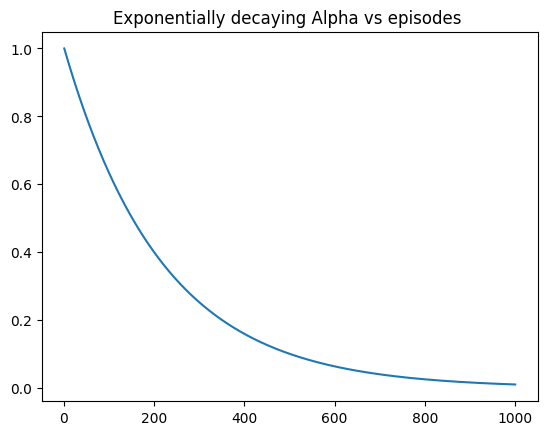

In [ ]:
def decayAlpha(initialValue, finalValue=0.01, maxSteps=250, decayType="exponential"):

  def epsilon_value1(step):
    slope = (finalValue-initialValue)/maxSteps
    return max(finalValue, initialValue + step * slope)

  def epsilon_value2(step):
    decay_rate = (finalValue/initialValue)**(1/maxSteps)
    return max(finalValue, initialValue*(decay_rate**step))

  return epsilon_value1 if decayType=="linear" else epsilon_value2

e = []
alpha = []
for i in range(1000):
  e.append(i+1)
  alpha.append(decayAlpha(initialValue = 1, maxSteps=1000, decayType="exponential")(i))

plt.plot(e,alpha)
plt.title("Exponentially decaying Alpha vs episodes ")
plt.show()

In [ ]:
e = []
alpha = []
for i in range(1000):
  e.append(i+1)
  alpha.append(decayAlpha(initialValue = 1, maxSteps=1000, decayType="linear")(i))

plt.plot(e,alpha)
plt.title("Linearly decaying Alpha vs episodes ")
plt.show()

3.3

We would like to solve the prediction problem using MonteCarloPrediction algorithm. Implement the
MonteCarloPrediction algorithm. Make use of the functions implemented in above two parts. Note
MonteCarloPrediction should work for both FVMC and EVMC settings. Test the algorithm for RME
using some pre-defined test cases and see the algorithm produces the desired results. Report your test
cases and observations.

In [ ]:
def MonteCarloPrediction(env, policy=default_policy, gamma=0.99, alpha=0.5, maxSteps=250, noEpisodes=50000, firstVisit=False):
  v = np.zeros(env.state_space_size)
  v_r = np.zeros(shape=(noEpisodes, env.state_space_size))
  visited = np.zeros(env.state_space_size)
  decayed_Alpha = decayAlpha(alpha, decayType = "linear")
  Gt={0:[0], 1:[0], 2:[0], 3:[0], 4:[0], 5:[0], 6:[0]}
  for e in range(noEpisodes):
    env.reset()
    t = generateTrajectory(env, policy, maxSteps)
    visited[:] = False
    for i, exp_tuple in t:
      s = exp_tuple[0]
      #print(exp_tuple)
      if visited[s] and firstVisit:
        continue
      else:
        visited[s] = True
      j=i
      G=0
      while j<=len(t):
        G = G + (gamma**(j-i))*t[j-1][1][2]
        j+=1
      #Gt[s][-1]=G
      v[s] = v[s]+alpha*(G-v[s])

    alpha = decayed_Alpha(e+1)
    v_r[e]=v

  return v, v_r

# v1 = MonteCarloPrediction(env)[0]
# v1

3.4

We would like to solve the prediction problem using TemporalDifferencePrediction algorithm. Implement the TemporalDifferencePrediction algorithm. Test the algorithm for RME using some pre-defined
test cases and see the algorithm produces the desired results. Report your test cases and observations.

In [ ]:
def TemporalDifferencePrediction(env, policy=default_policy, gamma=0.99, alpha=0.5, noEpisodes=50000):
  v = np.zeros(env.state_space_size)
  v_r = np.zeros(shape=(noEpisodes, env.state_space_size))
  decayed_Alpha = decayAlpha(alpha,decayType = "linear")

  for e in range(noEpisodes):
    s = env.reset()[0]["agent"]
    done = False
    while not done:
      a = max(policy[s], key=policy[s].get)
      ns, r, terminated, truncated, info = env.step(a)
      ns = ns["agent"]
      done = terminated
      td_target = r
      if not done :
        td_target = td_target+gamma*v[ns]

      td_error = td_target - v[s]
      v[s] = v[s]+alpha*td_error
      s = ns
    alpha = decayed_Alpha(e+1)
    v_r[e] = v

  return v, v_r

# v2 = TemporalDifferencePrediction(env)[0]
# v2

3.5

Now solve the prediction problem using n-Step TD Learning algorithm. Implement the n-Step TD
Learning algorithm. Test the algorithm for RME using some pre-defined test cases and see the algorithm
produces the desired results. Report your test cases and observations.

In [ ]:
def nStepTemporalDifferencePrediction(env, policy=default_policy, gamma=0.99, alpha=0.5, maxSteps=250, n=3, noEpisodes=50000):

  v = np.zeros(env.state_space_size)
  v_r = np.zeros(shape=(noEpisodes,env.state_space_size))
  decayed_Alpha = decayAlpha(alpha,decayType = "linear")

  for e in range(noEpisodes):
    alpha = decayed_Alpha(e)
    s = env.reset()[0]["agent"]
    done=False
    path=[]
    T=1e10
    t=0
    R=[]
    path.append(s)
    while True:
      if t<T:
        a = max(policy[s], key=policy[s].get)
        ns, r, terminated, truncated, info = env.step(a)
        ns = ns["agent"]
        done = terminated
        R.append(r)
        if done:
          T=t+1
      tau = t-n+1
      G=0
      s=ns
      t+=1
      path.append(s)
      if tau==T-1:
        break

      if tau>=0:
        i=tau+1
        while i<=min(tau+n,T):
          G+=(gamma**(i-tau-1))*R[i-1]
          i+=1
        if tau+n<T:
          G+=(gamma**n)*(v[path[tau+n]])
        v[path[tau]] = v[path[tau]] + alpha*(G-v[path[tau]])

    v_r[e] = v


  return v, v_r

# v3 = nStepTemporalDifferencePrediction(env=env, policy=default_policy)[0]
# v3

In [ ]:
np.linalg.norm(v3-v2)

1.0212154980587143

3.6

Finally, we will solve the prediction problem using TD(λ) algorithm (Backward-view). Implement the
TD(λ) algorithm. Test the algorithm for RME using some pre-defined test cases and see the algorithm
produces the desired results. Report your test cases and observations.

In [ ]:
def TDLambdaPrediction(env, policy=default_policy, gamma=0.99,alpha=0.5, lamda=0.2,noEpisodes=50000, EPlot = False):

  v= np.zeros(env.state_space_size)
  v_r = np.zeros(shape=(noEpisodes,env.state_space_size))
  E = np.zeros(shape=(noEpisodes, env.state_space_size))
  Et = []
  t=0
  decayed_Alpha = decayAlpha(alpha,decayType = "linear")
  for e in range(noEpisodes):
    E = np.zeros(shape=(noEpisodes, env.state_space_size))
    alpha = decayed_Alpha(e)
    s = env.reset()[0]["agent"]
    done=False
    while not done:
      a = max(policy[s],key = policy[s].get)
      ns, r, done, truncated, info = env.step(a)
      ns = ns["agent"]
      td_target = r
      if not done:
        td_target+=gamma*v[ns]
      td_error = td_target-v[s]
      E[e][s]+=1
      v+=alpha*td_error*E[e]
      E[e] = gamma*lamda*E[e]
      if e==100:
        Et.append(E[e].tolist())
        t+=1
      s=ns
    v_r[e]=v



  if EPlot==True:
    plt.figure(figsize=(25,10))
    t = np.array(range(t))+1
    def y(k):
      return np.array([row[k] for row in Et])
    for i in range(env.state_space_size):
      plt.plot(t, y(i), label="State %d"%i)
    plt.legend()
    plt.title("Eligibility Trace vs Time Steps")
    plt.show()

  return v,v_r

# TDLambdaPrediction(env)[0] # TD Lambda over 50000 episodes

3.7

Calculate the true value of state for each state. Implement it in the code and show the full derivation in
the report.

In [ ]:
v1 = MonteCarloPrediction(env, firstVisit=True)[0] #FVMC over 50000 episodes
v2 = MonteCarloPrediction(env)[0]    #EVMC over 50000 episodes
v3 = TemporalDifferencePrediction(env)[0] #TD Learning over 50000 episodes
v4 = nStepTemporalDifferencePrediction(env)[0] #n-Step TD Learning over 50000 episodes
v5 = TDLambdaPrediction(env)[0] # TD Lambda over 50000 episodes

In [ ]:
samples = np.array([v1,v2,v3,v4,v5])

true_v = (v1+v2+v3+v4+v5)/5
#true_v

# Calculate the mean of the samples
mean = np.mean(samples, axis=0)
rowstd = (((v1-mean)**2+(v2-mean)**2+(v3-mean)**3+(v4-mean)**4+(v5-mean)**5)/5)**0.5
# Print the standard deviation
print(rowstd)
print(mean)


[0.         0.07753821 0.10897804 0.         0.05493698 0.
 0.06513228 0.         0.04306469 0.05415723 0.0662938  0.11903582]
[ 0.         -0.17722997  0.17934395  0.         -0.24629607  0.
  0.03743025  0.         -0.29435338 -0.39650381 -0.16205902 -0.78790859]


In [ ]:
print((np.linalg.norm(true_v-v1)))

0.5100844985338714


3.8


Plot the MC-FVMC estimate of each non-terminal state of RME as it progress through different episodes.
In the same plot also plot the true estimate. Take maximum of 500 episodes. You can play with different
settings of α, for example, the step size parameter (α) starts from 0.5 and decreases exponentially to 0.01
till 250 episodes and after that it is constant. Or else you can also try with small (< 1) value of constant
α. Analyze the plots for each state and report your observations, findings and possible reasons for the
observed behavior.


In [ ]:
n=500

v, v_r = MonteCarloPrediction(env, maxSteps = 10000, noEpisodes = n, firstVisit = True)

e = range(n)
plt.figure(figsize=(25,10))
plt.plot(e, v_r[:,0], label="v(0)")
plt.plot(e, v_r[:,1], label="v(1)")
plt.plot(e, v_r[:,2], label="v(2)")
plt.plot(e, v_r[:,3], label="v(3)")
plt.plot(e, v_r[:,4], label="v(4)")
plt.plot(e, v_r[:,5], label="v(5)")
plt.plot(e, v_r[:,6], label="v(6)")
plt.plot(e, v_r[:,7], label="v(7)")
plt.plot(e, v_r[:,8], label="v(8)")
plt.plot(e, v_r[:,9], label="v(9)")
plt.plot(e, v_r[:,10], label="v(10)")
plt.plot(e, v_r[:,11], label="v(11)")
plt.plot(e, true_v[0]*np.ones(len(e)), label="True v(0)")
plt.plot(e, true_v[1]*np.ones(len(e)), label="True v(1)")
plt.plot(e, true_v[2]*np.ones(len(e)), label="True v(2)")
plt.plot(e, true_v[3]*np.ones(len(e)), label="True v(3)")
plt.plot(e, true_v[4]*np.ones(len(e)), label="True v(4)")
plt.plot(e, true_v[5]*np.ones(len(e)), label="True v(5)")
plt.plot(e, true_v[6]*np.ones(len(e)), label="True v(6)")
plt.plot(e, true_v[7]*np.ones(len(e)), label="True v(7)")
plt.plot(e, true_v[8]*np.ones(len(e)), label="True v(8)")
plt.plot(e, true_v[9]*np.ones(len(e)), label="True v(9)")
plt.plot(e, true_v[10]*np.ones(len(e)), label="True v(10)")
plt.plot(e, true_v[11]*np.ones(len(e)), label="True v(11)")



plt.legend()
plt.show()

print(v_r)

[[ 0.          0.0862844   0.15014589 ...  0.          0.
   0.        ]
 [ 0.          0.41930674  0.57340723 ...  0.          0.
   0.        ]
 [ 0.         -0.02819128  0.27311224 ...  0.          0.
   0.        ]
 ...
 [ 0.         -0.1506191   0.23522738 ... -0.32529105 -0.07272986
  -0.78524637]
 [ 0.         -0.14156341  0.24188011 ... -0.32529105 -0.07272986
  -0.78524637]
 [ 0.         -0.13883935  0.24606458 ... -0.32529105 -0.07272986
  -0.78524637]]


3.9

Plot the MC-EVMC estimate of each non-terminal state of RME as it progress through different episodes.
In the same plot also plot the true estimate. Take maximum of 500 episodes. You can play with different
settings of α, for example, the step size parameter (α) starts from 0.5 and decreases exponentially to 0.01
till 250 episodes and after that it is constant. Or else you can also try with small (< 1) value of constant
α. Analyze the plots for each state and report your observations, findings and possible reasons for the
observed behavior. How does EVMC fair against FVMC?


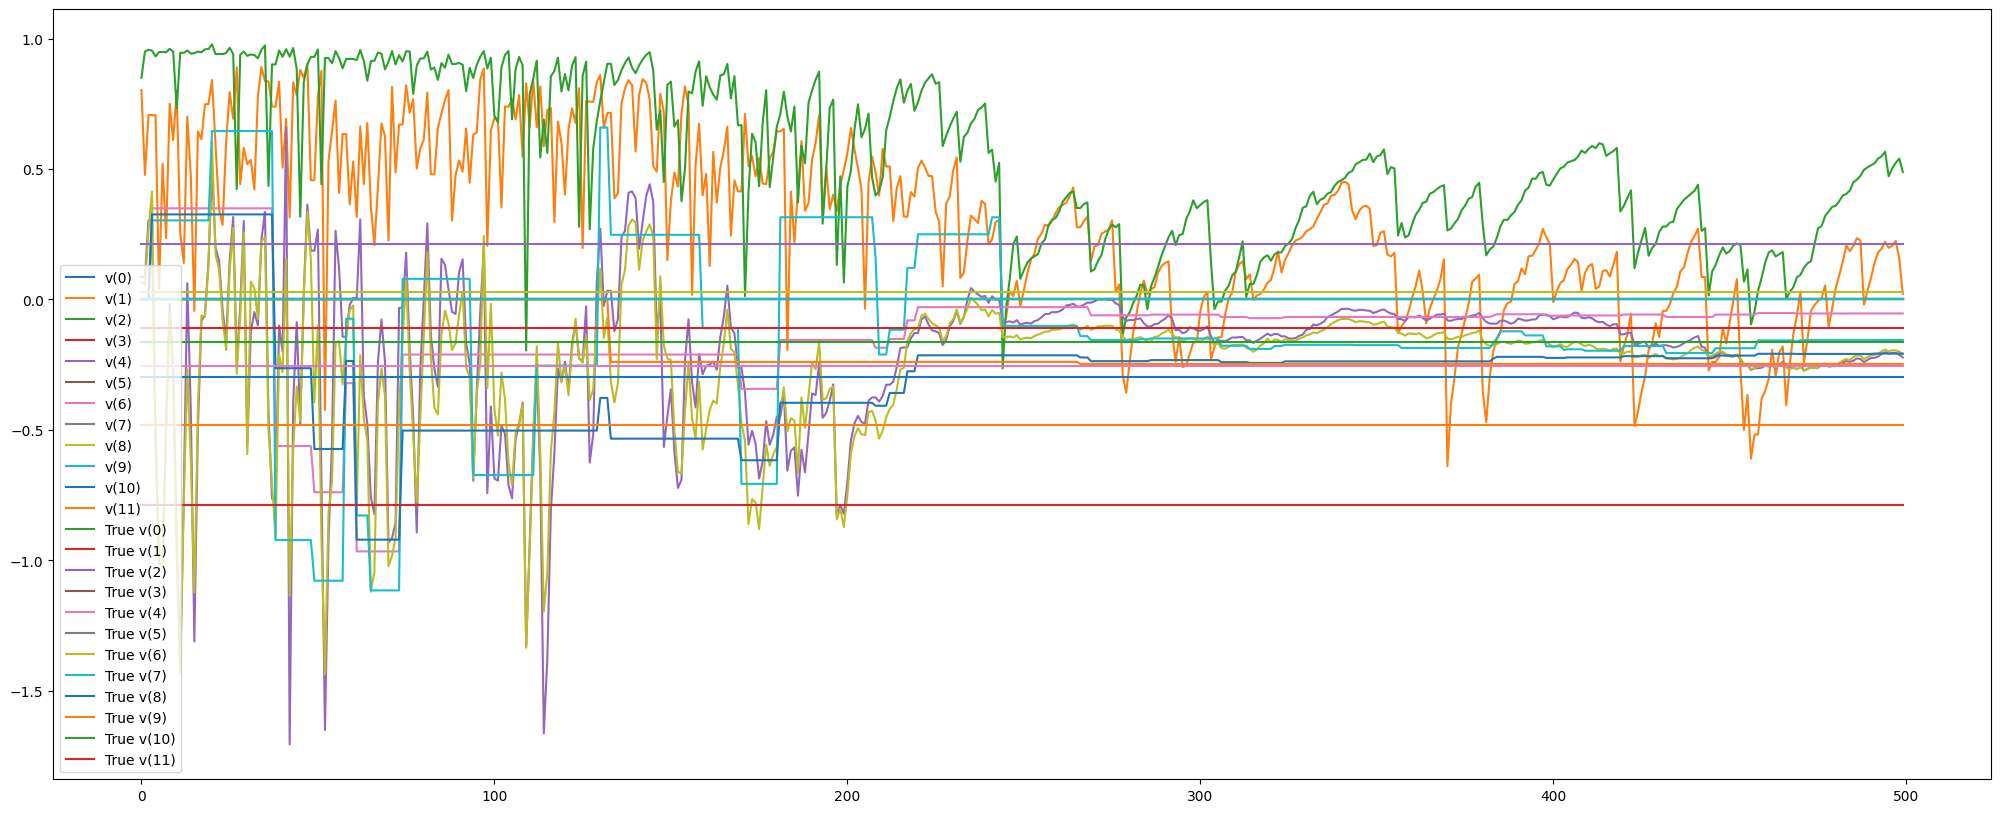

[[ 0.          0.80345639  0.8500625  ...  0.          0.
   0.        ]
 [ 0.          0.47755656  0.95048836 ...  0.          0.
   0.        ]
 [ 0.          0.70717132  0.95762816 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.224438    0.52378258 ... -0.15556934 -0.20733752
  -0.2469268 ]
 [ 0.          0.15629766  0.54054493 ... -0.15556934 -0.20733752
  -0.2469268 ]
 [ 0.          0.0220764   0.48884092 ... -0.15556934 -0.20733752
  -0.2469268 ]]


In [ ]:
n=500

v, v_r = MonteCarloPrediction(env, maxSteps = 10000, noEpisodes = n, firstVisit = False)

e = range(n)
plt.figure(figsize=(25,10))
plt.plot(e, v_r[:,0], label="v(0)")
plt.plot(e, v_r[:,1], label="v(1)")
plt.plot(e, v_r[:,2], label="v(2)")
plt.plot(e, v_r[:,3], label="v(3)")
plt.plot(e, v_r[:,4], label="v(4)")
plt.plot(e, v_r[:,5], label="v(5)")
plt.plot(e, v_r[:,6], label="v(6)")
plt.plot(e, v_r[:,7], label="v(7)")
plt.plot(e, v_r[:,8], label="v(8)")
plt.plot(e, v_r[:,9], label="v(9)")
plt.plot(e, v_r[:,10], label="v(10)")
plt.plot(e, v_r[:,11], label="v(11)")
plt.plot(e, true_v[0]*np.ones(len(e)), label="True v(0)")
plt.plot(e, true_v[1]*np.ones(len(e)), label="True v(1)")
plt.plot(e, true_v[2]*np.ones(len(e)), label="True v(2)")
plt.plot(e, true_v[3]*np.ones(len(e)), label="True v(3)")
plt.plot(e, true_v[4]*np.ones(len(e)), label="True v(4)")
plt.plot(e, true_v[5]*np.ones(len(e)), label="True v(5)")
plt.plot(e, true_v[6]*np.ones(len(e)), label="True v(6)")
plt.plot(e, true_v[7]*np.ones(len(e)), label="True v(7)")
plt.plot(e, true_v[8]*np.ones(len(e)), label="True v(8)")
plt.plot(e, true_v[9]*np.ones(len(e)), label="True v(9)")
plt.plot(e, true_v[10]*np.ones(len(e)), label="True v(10)")
plt.plot(e, true_v[11]*np.ones(len(e)), label="True v(11)")


plt.legend()
plt.show()

print(v_r)

3.10

Plot the TD estimate of each non-terminal state of RME as it progress through different episodes. In
the same plot also plot the true estimate. Take maximum of 500 episodes. You can play with different
settings of α, for example, the step size parameter (α) starts from 0.5 and decreases exponentially to 0.01
till 250 episodes and after that it is constant. Or else you can also try with small (< 1) value of constant
α. Analyze the plots for each state and report your observations, findings and possible reasons for the
observed behavior.

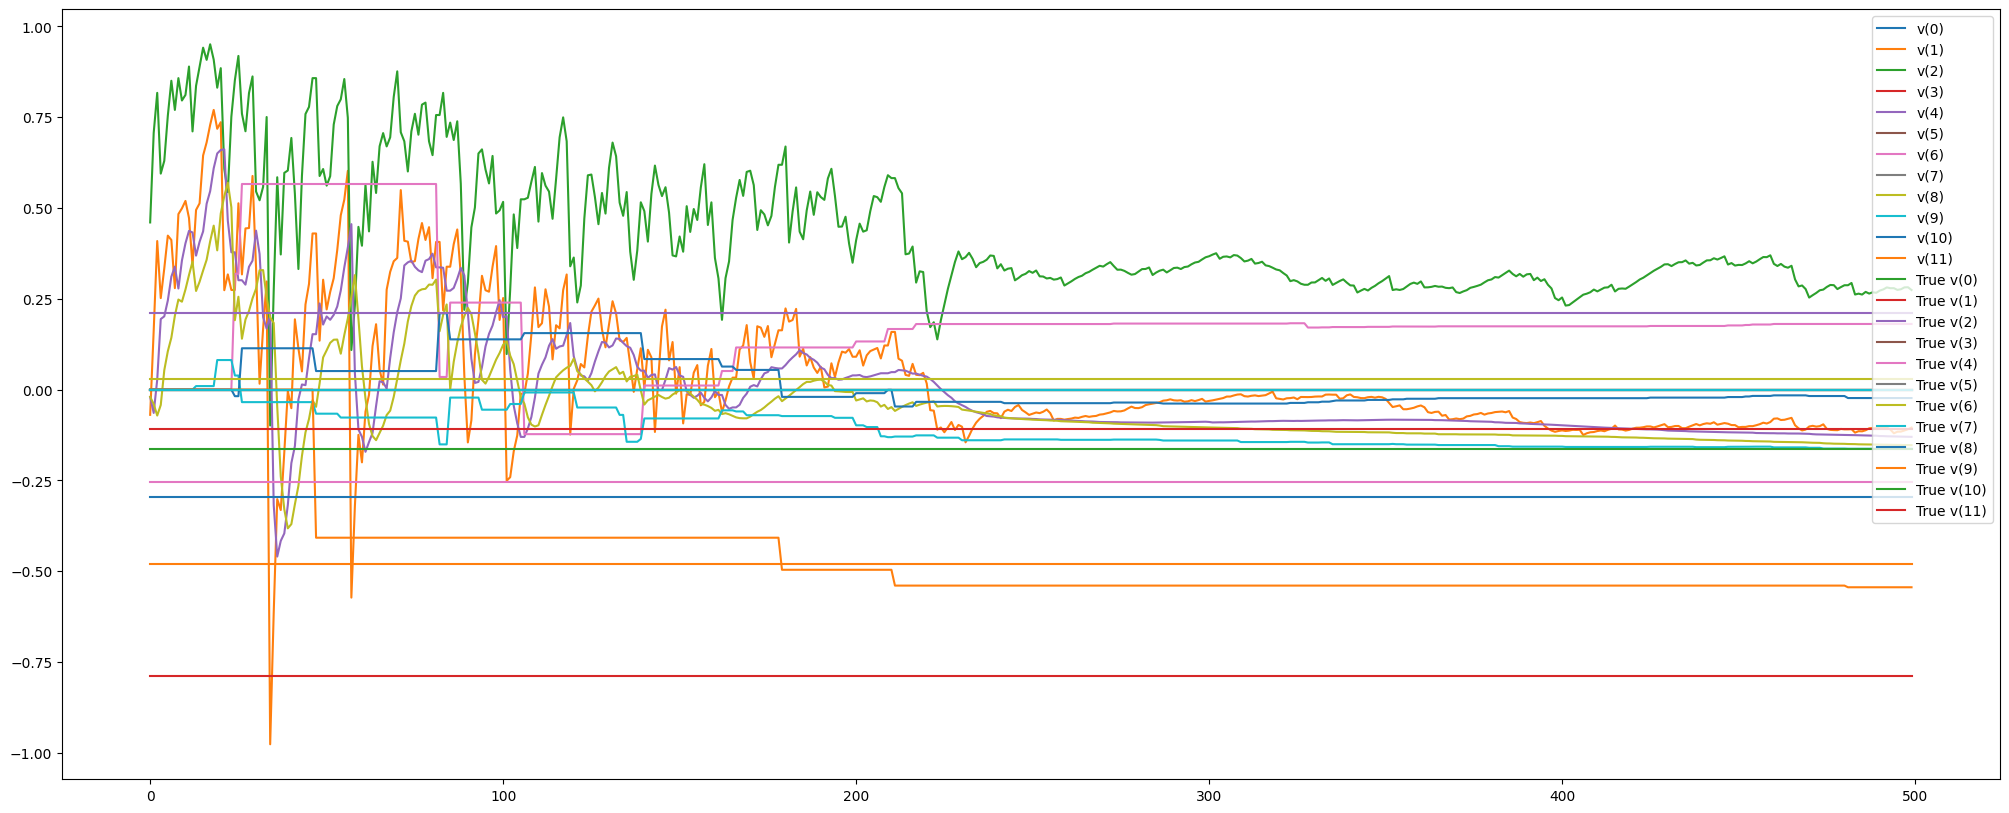

[[ 0.         -0.06950249  0.460299   ...  0.          0.
   0.        ]
 [ 0.          0.16231968  0.70684607 ...  0.          0.
   0.        ]
 [ 0.          0.40909861  0.81714952 ...  0.          0.
   0.        ]
 ...
 [ 0.         -0.11254107  0.28146135 ... -0.16287973 -0.02326543
  -0.54435155]
 [ 0.         -0.10903963  0.28183683 ... -0.16287973 -0.02326543
  -0.54435155]
 [ 0.         -0.10457951  0.27428192 ... -0.16287973 -0.02326543
  -0.54435155]]


In [ ]:
n=500

v, v_r = TemporalDifferencePrediction(env,noEpisodes = n)

e = range(n)
plt.figure(figsize=(25,10))
plt.plot(e, v_r[:,0], label="v(0)")
plt.plot(e, v_r[:,1], label="v(1)")
plt.plot(e, v_r[:,2], label="v(2)")
plt.plot(e, v_r[:,3], label="v(3)")
plt.plot(e, v_r[:,4], label="v(4)")
plt.plot(e, v_r[:,5], label="v(5)")
plt.plot(e, v_r[:,6], label="v(6)")
plt.plot(e, v_r[:,7], label="v(7)")
plt.plot(e, v_r[:,8], label="v(8)")
plt.plot(e, v_r[:,9], label="v(9)")
plt.plot(e, v_r[:,10], label="v(10)")
plt.plot(e, v_r[:,11], label="v(11)")
plt.plot(e, true_v[0]*np.ones(len(e)), label="True v(0)")
plt.plot(e, true_v[1]*np.ones(len(e)), label="True v(1)")
plt.plot(e, true_v[2]*np.ones(len(e)), label="True v(2)")
plt.plot(e, true_v[3]*np.ones(len(e)), label="True v(3)")
plt.plot(e, true_v[4]*np.ones(len(e)), label="True v(4)")
plt.plot(e, true_v[5]*np.ones(len(e)), label="True v(5)")
plt.plot(e, true_v[6]*np.ones(len(e)), label="True v(6)")
plt.plot(e, true_v[7]*np.ones(len(e)), label="True v(7)")
plt.plot(e, true_v[8]*np.ones(len(e)), label="True v(8)")
plt.plot(e, true_v[9]*np.ones(len(e)), label="True v(9)")
plt.plot(e, true_v[10]*np.ones(len(e)), label="True v(10)")
plt.plot(e, true_v[11]*np.ones(len(e)), label="True v(11)")



plt.legend()
plt.show()

print(v_r)

3.11

Plot the n-Step TD estimate of each non-terminal state of RME as it progress through different episodes.
You can take n = 3. In the same plot also plot the true estimate. Take maximum of 500 episodes. You can
play with different settings of α, for example, the step size parameter (α) starts from 0.5 and decreases
exponentially to 0.01 till 250 episodes and after that it is constant. Or else you can also try with small
(< 1) value of constant α. Analyze the plots for each state and report your observations, findings and
possible reasons for the observed behavior.


In [ ]:
n=500

v, v_r = nStepTemporalDifferencePrediction(env, noEpisodes = n)

e = range(n)
plt.figure(figsize=(25,10))
plt.plot(e, v_r[:,0], label="v(0)")
plt.plot(e, v_r[:,1], label="v(1)")
plt.plot(e, v_r[:,2], label="v(2)")
plt.plot(e, v_r[:,3], label="v(3)")
plt.plot(e, v_r[:,4], label="v(4)")
plt.plot(e, v_r[:,5], label="v(5)")
plt.plot(e, v_r[:,6], label="v(6)")
plt.plot(e, v_r[:,7], label="v(7)")
plt.plot(e, v_r[:,8], label="v(8)")
plt.plot(e, v_r[:,9], label="v(9)")
plt.plot(e, v_r[:,10], label="v(10)")
plt.plot(e, v_r[:,11], label="v(11)")
plt.plot(e, true_v[0]*np.ones(len(e)), label="True v(0)")
plt.plot(e, true_v[1]*np.ones(len(e)), label="True v(1)")
plt.plot(e, true_v[2]*np.ones(len(e)), label="True v(2)")
plt.plot(e, true_v[3]*np.ones(len(e)), label="True v(3)")
plt.plot(e, true_v[4]*np.ones(len(e)), label="True v(4)")
plt.plot(e, true_v[5]*np.ones(len(e)), label="True v(5)")
plt.plot(e, true_v[6]*np.ones(len(e)), label="True v(6)")
plt.plot(e, true_v[7]*np.ones(len(e)), label="True v(7)")
plt.plot(e, true_v[8]*np.ones(len(e)), label="True v(8)")
plt.plot(e, true_v[9]*np.ones(len(e)), label="True v(9)")
plt.plot(e, true_v[10]*np.ones(len(e)), label="True v(10)")
plt.plot(e, true_v[11]*np.ones(len(e)), label="True v(11)")



plt.legend()
plt.show()

print(v_r)

[[ 0.          0.00963135  0.10297704 ... -0.12589844  0.
   0.        ]
 [ 0.         -0.11686455  0.69384765 ... -0.12589844  0.
   0.        ]
 [ 0.          0.53954551 -0.06597904 ... -0.12589844  0.
   0.        ]
 ...
 [ 0.         -0.41223398 -0.02648716 ... -0.34122525 -0.18672334
   0.        ]
 [ 0.         -0.40669494 -0.02648716 ... -0.34122525 -0.18672334
   0.        ]
 [ 0.         -0.38576362 -0.05798559 ... -0.34122525 -0.18672334
   0.        ]]


3.12

Plot TD(λ) estimate of each non-terminal state of RME as it progress through different episodes. You
can take λ = 0.3. In the same plot also plot the true estimate. Take maximum of 500 episodes. You can
play with different settings of α, for example, the step size parameter (α) starts from 0.5 and decreases
exponentially to 0.01 till 250 episodes and after that it is constant. Or else you can also try with small (< 1) value of constant α. Analyze the plots for each state and report your observations, findings and
possible reasons for the observed behavior.


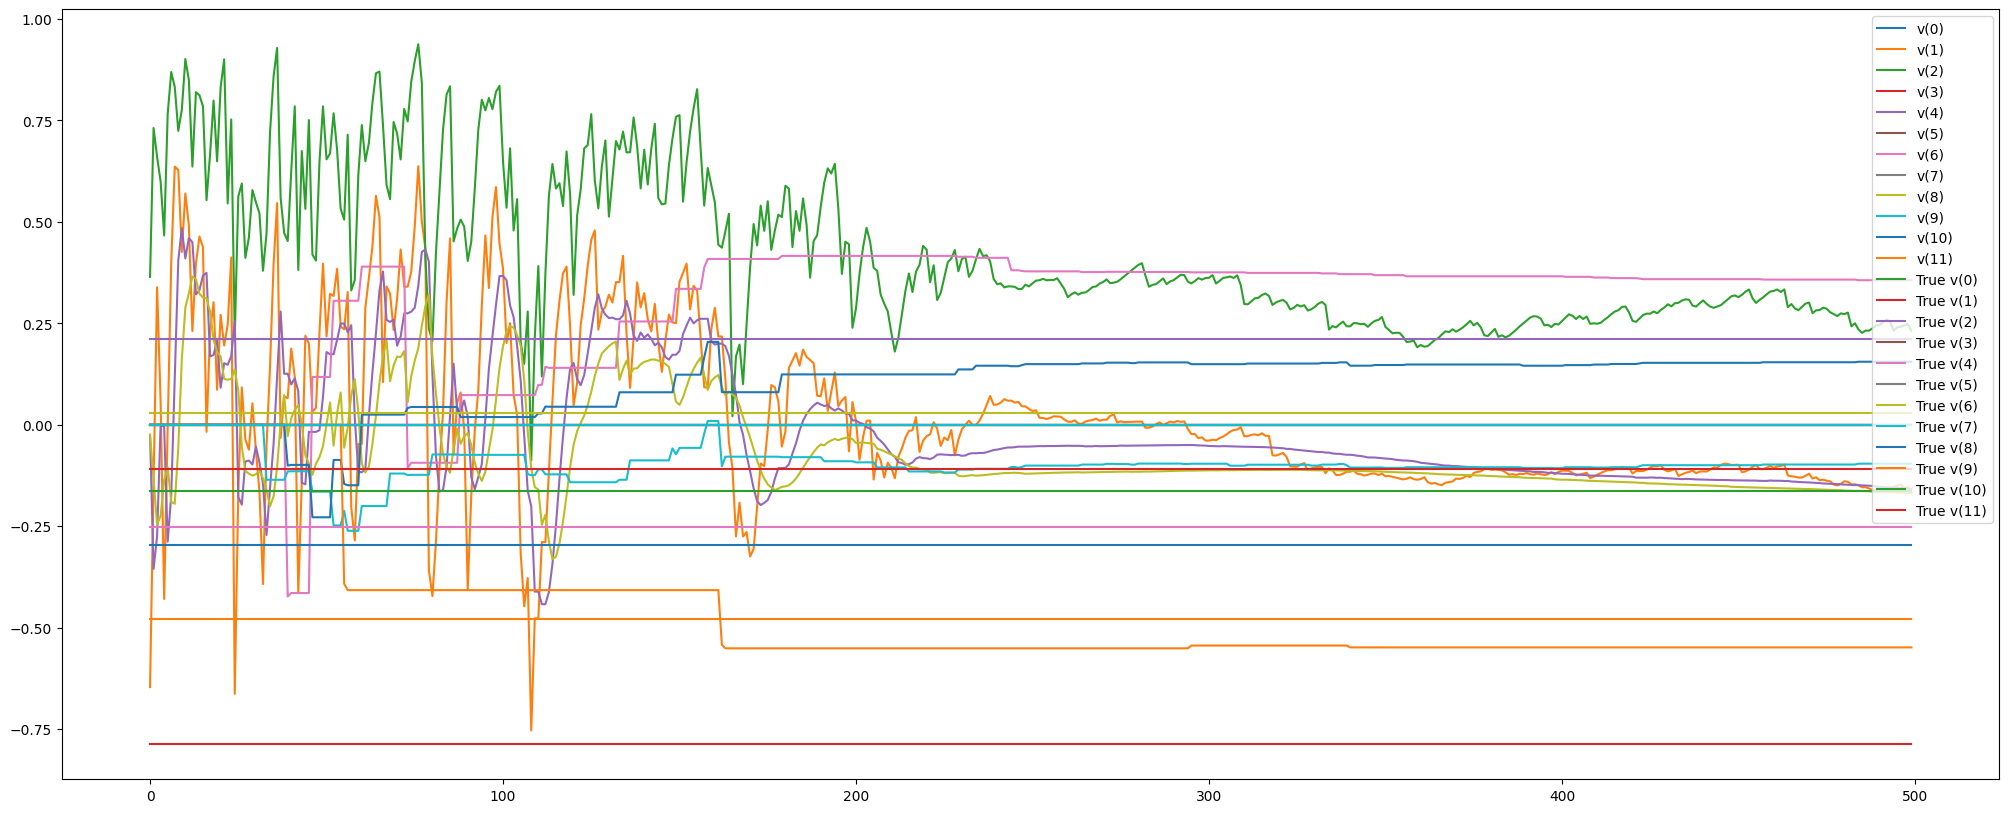

[[ 0.         -0.64693486  0.3644184  ...  0.          0.
   0.        ]
 [ 0.         -0.14474256  0.73143127 ...  0.          0.
   0.        ]
 [ 0.          0.33895071  0.66024342 ...  0.          0.
   0.        ]
 ...
 [ 0.         -0.15709211  0.24503215 ... -0.09611865  0.15522712
  -0.54904014]
 [ 0.         -0.15277009  0.24785057 ... -0.09611865  0.15522712
  -0.54904014]
 [ 0.         -0.16719267  0.23133641 ... -0.09611865  0.15522712
  -0.54904014]]


In [ ]:
n=500

v, v_r = TDLambdaPrediction(env, noEpisodes = n)

e = range(n)
plt.figure(figsize=(25,10))
plt.plot(e, v_r[:,0], label="v(0)")
plt.plot(e, v_r[:,1], label="v(1)")
plt.plot(e, v_r[:,2], label="v(2)")
plt.plot(e, v_r[:,3], label="v(3)")
plt.plot(e, v_r[:,4], label="v(4)")
plt.plot(e, v_r[:,5], label="v(5)")
plt.plot(e, v_r[:,6], label="v(6)")
plt.plot(e, v_r[:,7], label="v(7)")
plt.plot(e, v_r[:,8], label="v(8)")
plt.plot(e, v_r[:,9], label="v(9)")
plt.plot(e, v_r[:,10], label="v(10)")
plt.plot(e, v_r[:,11], label="v(11)")
plt.plot(e, true_v[0]*np.ones(len(e)), label="True v(0)")
plt.plot(e, true_v[1]*np.ones(len(e)), label="True v(1)")
plt.plot(e, true_v[2]*np.ones(len(e)), label="True v(2)")
plt.plot(e, true_v[3]*np.ones(len(e)), label="True v(3)")
plt.plot(e, true_v[4]*np.ones(len(e)), label="True v(4)")
plt.plot(e, true_v[5]*np.ones(len(e)), label="True v(5)")
plt.plot(e, true_v[6]*np.ones(len(e)), label="True v(6)")
plt.plot(e, true_v[7]*np.ones(len(e)), label="True v(7)")
plt.plot(e, true_v[8]*np.ones(len(e)), label="True v(8)")
plt.plot(e, true_v[9]*np.ones(len(e)), label="True v(9)")
plt.plot(e, true_v[10]*np.ones(len(e)), label="True v(10)")
plt.plot(e, true_v[11]*np.ones(len(e)), label="True v(11)")



plt.legend()
plt.show()

print(v_r)

3.13

For episode number 100, in the TD(λ) algorithm, plot the progress of the eligibility trace vs time step for
each non-terminal state. Plot eligibility trace for each non-terminal state in the same plot.

In [ ]:
TDLambdaPrediction(env,noEpisodes=500, EPlot=True)[0]

array([ 0.        , -0.22785571,  0.28633495,  0.        , -0.21819468,
        0.        ,  0.3116016 ,  0.        , -0.24595845, -0.24079526,
        0.00848022, -0.86354479])

In [ ]:
environments=[]

n=50 #Number of environments

for _ in range(n):
  environments.append(make('RME-v0', seed=random.choice(range(1,100))))

avg1 = 0
avgv_r1 = 0

avg2 = 0
avgv_r2 = 0

avg3 = 0
avgv_r3 = 0

avg4 = 0
avgv_r4 = 0

avg5 = 0
avgv_r5 = 0

for _ in range(n):
  v1, v_r1 = MonteCarloPrediction(environments[_], policy=policyL, gamma=0.99, alpha = 0.5, maxSteps = 1000, noEpisodes = 500, firstVisit = True)
  v2, v_r2 = MonteCarloPrediction(environments[_], policy=policyL, gamma=0.99, alpha = 0.5, maxSteps = 1000, noEpisodes = 500, firstVisit = False)
  v3, v_r3 = TemporalDifferencePrediction(environments[_], policy=policyL, gamma=0.99, alpha = 0.5, noEpisodes = 500)
  v4, v_r4 = nStepTemporalDifferencePrediction(env, noEpisodes = n, n=4)
  v5, v_r5 = TDLambdaPrediction(env, noEpisodes = n)

  avg1+=v1
  avg2+=v2
  avg3+=v3
  avg4+=v4
  avg5+=v5

  avgv_r1+=v_r1
  avgv_r2+=v_r2
  avgv_r3+=v_r3
  avgv_r4+=v_r4
  avgv_r5+=v_r5

avg1/=n
avg2/=n
avg3/=n
avg4/=n
avg5/=n

avgv_r1/=n
avgv_r2/=n
avgv_r3/=n
avgv_r4/=n
avgv_r5/=n



3.14

Plot the MC-FVMC estimate of each non-terminal state of RME as it progress through different episodes.
But this time, the x-axis (episodes) should be log-scale. In the same plot also plot the true estimate.
Take maximum of 500 episodes. You can play with different settings of α, for example, the step size
parameter (α) starts from 0.5 and decreases exponentially to 0.01 till 250 episodes and after that it is
constant. Or else you can also try with small (< 1) value of constant α. This plot will help to zoom in
and observe the behavior of the estimates in the initial stages. Analyze the plots for each state and report
your observations, findings and possible reasons for the observed behavior.

In [ ]:
n=500

v, v_r = MonteCarloPrediction(env, maxSteps = 10000, noEpisodes = n, firstVisit = True)

e = range(n)
plt.figure(figsize=(25,10))
plt.plot(e, v_r[:,0], label="v(0)")
plt.plot(e, v_r[:,1], label="v(1)")
plt.plot(e, v_r[:,2], label="v(2)")
plt.plot(e, v_r[:,3], label="v(3)")
plt.plot(e, v_r[:,4], label="v(4)")
plt.plot(e, v_r[:,5], label="v(5)")
plt.plot(e, v_r[:,6], label="v(6)")
plt.plot(e, v_r[:,7], label="v(7)")
plt.plot(e, v_r[:,8], label="v(8)")
plt.plot(e, v_r[:,9], label="v(9)")
plt.plot(e, v_r[:,10], label="v(10)")
plt.plot(e, v_r[:,11], label="v(11)")
plt.plot(e, true_v[0]*np.ones(len(e)), label="True v(0)")
plt.plot(e, true_v[1]*np.ones(len(e)), label="True v(1)")
plt.plot(e, true_v[2]*np.ones(len(e)), label="True v(2)")
plt.plot(e, true_v[3]*np.ones(len(e)), label="True v(3)")
plt.plot(e, true_v[4]*np.ones(len(e)), label="True v(4)")
plt.plot(e, true_v[5]*np.ones(len(e)), label="True v(5)")
plt.plot(e, true_v[6]*np.ones(len(e)), label="True v(6)")
plt.plot(e, true_v[7]*np.ones(len(e)), label="True v(7)")
plt.plot(e, true_v[8]*np.ones(len(e)), label="True v(8)")
plt.plot(e, true_v[9]*np.ones(len(e)), label="True v(9)")
plt.plot(e, true_v[10]*np.ones(len(e)), label="True v(10)")
plt.plot(e, true_v[11]*np.ones(len(e)), label="True v(11)")


plt.xscale('log')
plt.legend()
plt.show()

print(v_r)

[[ 0.          0.23834564  0.37747512 ...  0.          0.
   0.        ]
 [ 0.         -0.60255352 -0.51988814 ...  0.          0.
   0.        ]
 [ 0.         -0.94436311 -0.77550806 ...  0.          0.
   0.        ]
 ...
 [ 0.         -0.21547578  0.183575   ... -0.3616624  -0.16621089
  -0.54373063]
 [ 0.         -0.22182984  0.17452221 ... -0.3616624  -0.16621089
  -0.54373063]
 [ 0.         -0.21953001  0.17367234 ... -0.3616624  -0.16621089
  -0.54373063]]


3.15

Plot the MC-EVMC estimate of each non-terminal state of RME as it progress through different episodes.
But this time, the x-axis (episodes) should be log-scale. In the same plot also plot the true estimate.
Take maximum of 500 episodes. You can play with different settings of α, for example, the step size
parameter (α) starts from 0.5 and decreases exponentially to 0.01 till 250 episodes and after that it is
constant. Or else you can also try with small (< 1) value of constant α. This plot will help to zoom in
and observe the behavior of the estimates in the initial stages. Analyze the plots for each state and report
your observations, findings and possible reasons for the observed behavior. How does EVMC fair against
FVMC?


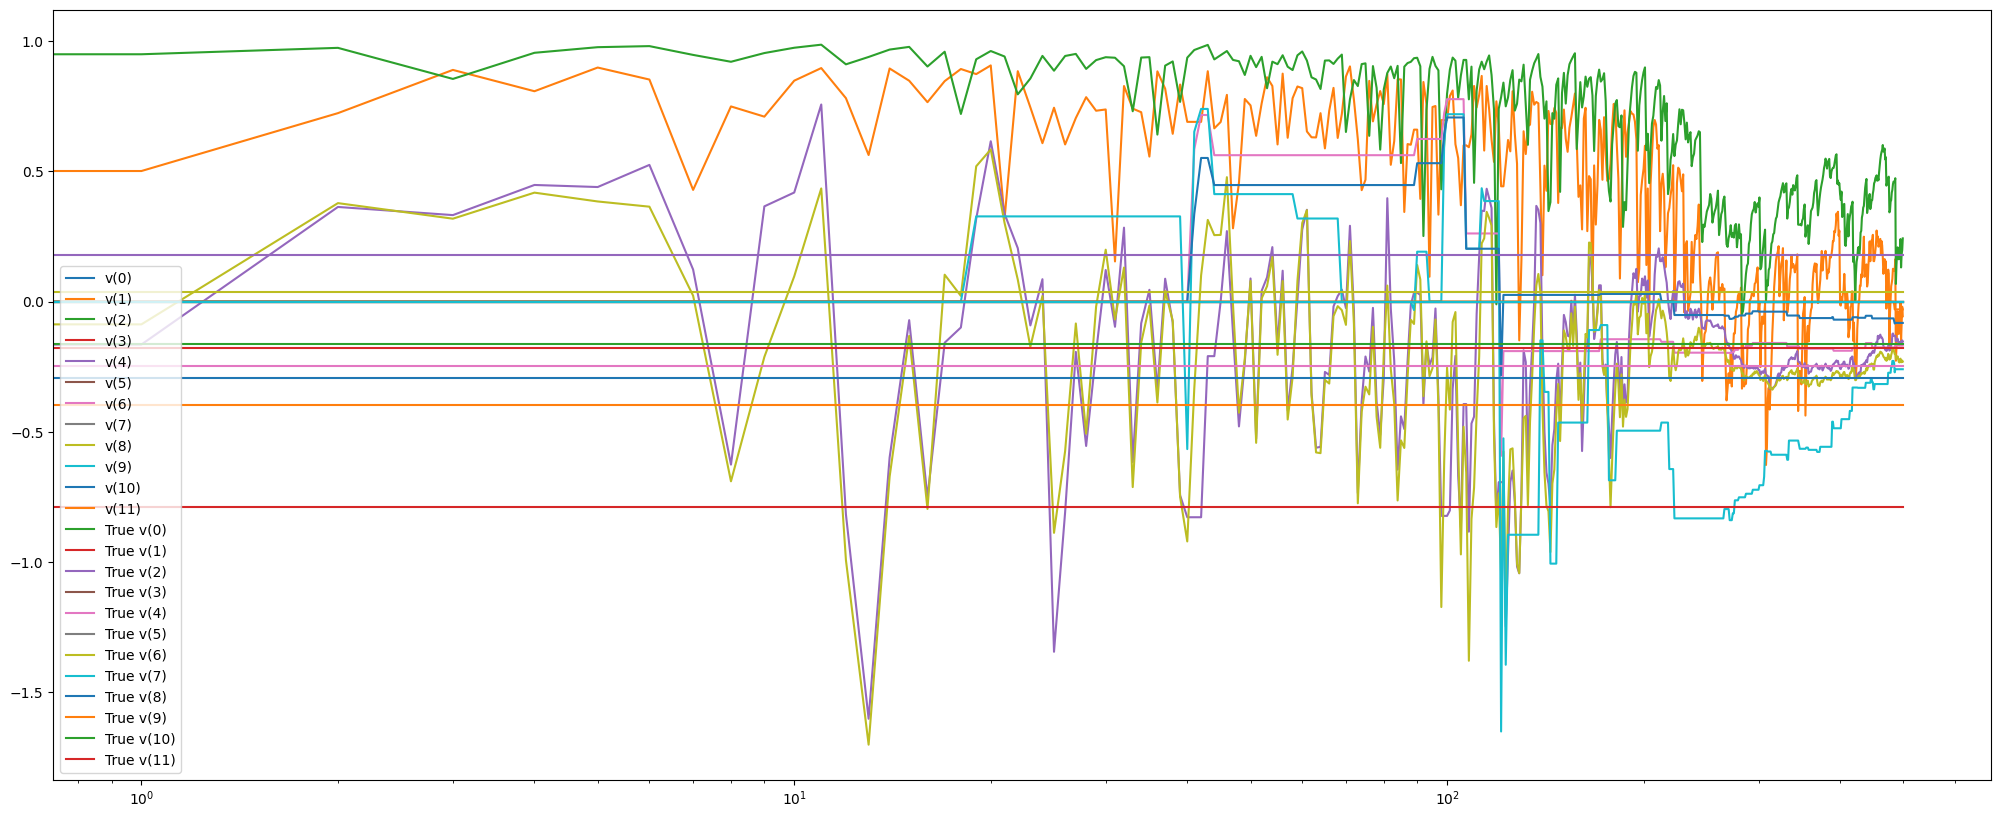

[[ 0.          0.85128918  0.85026116 ...  0.          0.
   0.        ]
 [ 0.          0.50169802  0.95032249 ...  0.          0.
   0.        ]
 [ 0.          0.72409167  0.97496651 ...  0.          0.
   0.        ]
 ...
 [ 0.         -0.08892902  0.18199485 ... -0.25988159 -0.08192492
  -0.029998  ]
 [ 0.         -0.01964895  0.19777815 ... -0.25988159 -0.08192492
  -0.029998  ]
 [ 0.         -0.05631727  0.24289545 ... -0.25988159 -0.08192492
  -0.029998  ]]


In [ ]:
n=500

v, v_r = MonteCarloPrediction(env, maxSteps = 10000, noEpisodes = n, firstVisit = False)

e = range(n)
plt.figure(figsize=(25,10))
plt.plot(e, v_r[:,0], label="v(0)")
plt.plot(e, v_r[:,1], label="v(1)")
plt.plot(e, v_r[:,2], label="v(2)")
plt.plot(e, v_r[:,3], label="v(3)")
plt.plot(e, v_r[:,4], label="v(4)")
plt.plot(e, v_r[:,5], label="v(5)")
plt.plot(e, v_r[:,6], label="v(6)")
plt.plot(e, v_r[:,7], label="v(7)")
plt.plot(e, v_r[:,8], label="v(8)")
plt.plot(e, v_r[:,9], label="v(9)")
plt.plot(e, v_r[:,10], label="v(10)")
plt.plot(e, v_r[:,11], label="v(11)")
plt.plot(e, true_v[0]*np.ones(len(e)), label="True v(0)")
plt.plot(e, true_v[1]*np.ones(len(e)), label="True v(1)")
plt.plot(e, true_v[2]*np.ones(len(e)), label="True v(2)")
plt.plot(e, true_v[3]*np.ones(len(e)), label="True v(3)")
plt.plot(e, true_v[4]*np.ones(len(e)), label="True v(4)")
plt.plot(e, true_v[5]*np.ones(len(e)), label="True v(5)")
plt.plot(e, true_v[6]*np.ones(len(e)), label="True v(6)")
plt.plot(e, true_v[7]*np.ones(len(e)), label="True v(7)")
plt.plot(e, true_v[8]*np.ones(len(e)), label="True v(8)")
plt.plot(e, true_v[9]*np.ones(len(e)), label="True v(9)")
plt.plot(e, true_v[10]*np.ones(len(e)), label="True v(10)")
plt.plot(e, true_v[11]*np.ones(len(e)), label="True v(11)")


plt.xscale('log')
plt.legend()
plt.show()

print(v_r)

3.16

Plot the TD estimate of each non-terminal state of RME as it progress through different episodes. But
this time, the x-axis (episodes) should be log-scale. In the same plot also plot the true estimate. Take
maximum of 500 episodes. You can play with different settings of α, for example, the step size parameter
(α) starts from 0.5 and decreases exponentially to 0.01 till 250 episodes and after that it is constant. Or
else you can also try with small (< 1) value of constant α. This plot will help to zoom in and observe
the behavior of the estimates in the initial stages. Analyze the plots for each state and report your
observations, findings and possible reasons for the observed behavior.

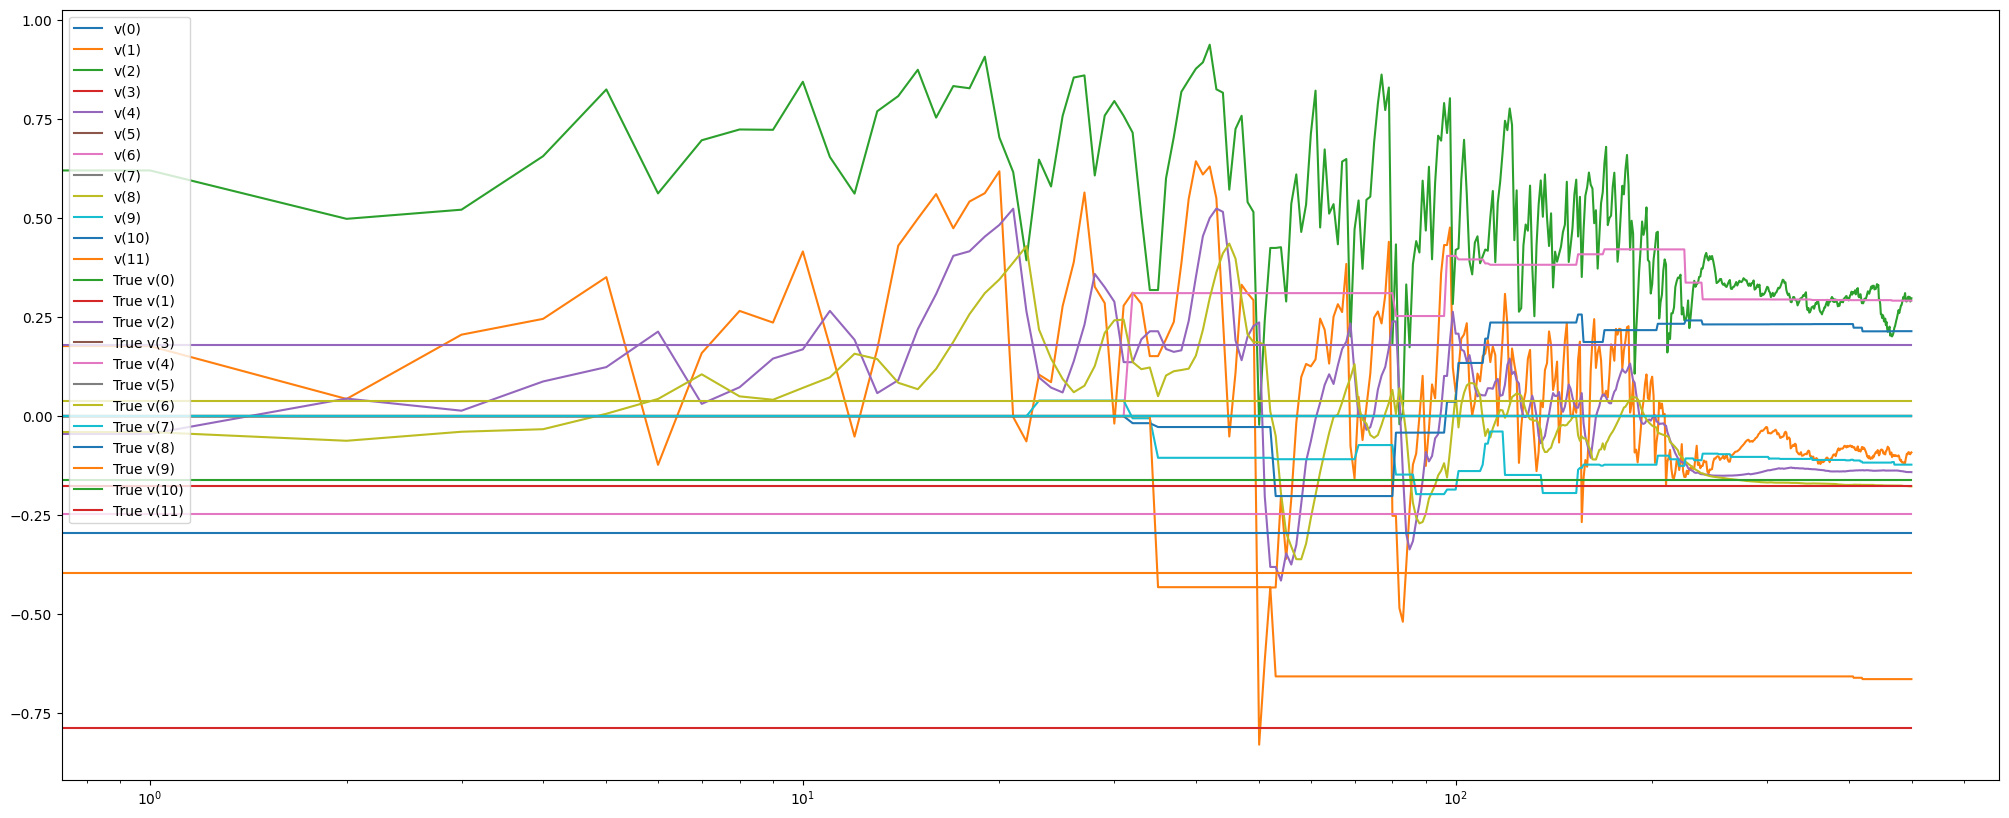

[[ 0.         -0.03        0.460299   ...  0.          0.
   0.        ]
 [ 0.          0.17714276  0.62040143 ...  0.          0.
   0.        ]
 [ 0.          0.04365516  0.49825921 ...  0.          0.
   0.        ]
 ...
 [ 0.         -0.09606104  0.28951711 ... -0.12215067  0.21471295
  -0.66346682]
 [ 0.         -0.09235611  0.29116032 ... -0.12215067  0.21471295
  -0.66346682]
 [ 0.         -0.09127063  0.29782389 ... -0.12215067  0.21471295
  -0.66346682]]


In [ ]:
n=500

v, v_r = TemporalDifferencePrediction(env,noEpisodes = n)

e = range(n)
plt.figure(figsize=(25,10))
plt.plot(e, v_r[:,0], label="v(0)")
plt.plot(e, v_r[:,1], label="v(1)")
plt.plot(e, v_r[:,2], label="v(2)")
plt.plot(e, v_r[:,3], label="v(3)")
plt.plot(e, v_r[:,4], label="v(4)")
plt.plot(e, v_r[:,5], label="v(5)")
plt.plot(e, v_r[:,6], label="v(6)")
plt.plot(e, v_r[:,7], label="v(7)")
plt.plot(e, v_r[:,8], label="v(8)")
plt.plot(e, v_r[:,9], label="v(9)")
plt.plot(e, v_r[:,10], label="v(10)")
plt.plot(e, v_r[:,11], label="v(11)")
plt.plot(e, true_v[0]*np.ones(len(e)), label="True v(0)")
plt.plot(e, true_v[1]*np.ones(len(e)), label="True v(1)")
plt.plot(e, true_v[2]*np.ones(len(e)), label="True v(2)")
plt.plot(e, true_v[3]*np.ones(len(e)), label="True v(3)")
plt.plot(e, true_v[4]*np.ones(len(e)), label="True v(4)")
plt.plot(e, true_v[5]*np.ones(len(e)), label="True v(5)")
plt.plot(e, true_v[6]*np.ones(len(e)), label="True v(6)")
plt.plot(e, true_v[7]*np.ones(len(e)), label="True v(7)")
plt.plot(e, true_v[8]*np.ones(len(e)), label="True v(8)")
plt.plot(e, true_v[9]*np.ones(len(e)), label="True v(9)")
plt.plot(e, true_v[10]*np.ones(len(e)), label="True v(10)")
plt.plot(e, true_v[11]*np.ones(len(e)), label="True v(11)")


plt.xscale('log')
plt.legend()
plt.show()

print(v_r)

3.17

Plot the n-Step TD estimate of each non-terminal state of RME as it progress through different episodes.
But this time, the x-axis (episodes) should be log-scale. In the same plot also plot the true estimate.
Take maximum of 500 episodes. You can play with different settings of α, for example, the step size
parameter (α) starts from 0.5 and decreases exponentially to 0.01 till 250 episodes and after that it is
constant. Or else you can also try with small (< 1) value of constant α. This plot will help to zoom in
and observe the behavior of the estimates in the initial stages. Analyze the plots for each state and report
your observations, findings and possible reasons for the observed behavior.

In [ ]:
n=500

v, v_r = nStepTemporalDifferencePrediction(env, noEpisodes = n)

e = range(n)
plt.figure(figsize=(25,10))
plt.plot(e, v_r[:,0], label="v(0)")
plt.plot(e, v_r[:,1], label="v(1)")
plt.plot(e, v_r[:,2], label="v(2)")
plt.plot(e, v_r[:,3], label="v(3)")
plt.plot(e, v_r[:,4], label="v(4)")
plt.plot(e, v_r[:,5], label="v(5)")
plt.plot(e, v_r[:,6], label="v(6)")
plt.plot(e, v_r[:,7], label="v(7)")
plt.plot(e, v_r[:,8], label="v(8)")
plt.plot(e, v_r[:,9], label="v(9)")
plt.plot(e, v_r[:,10], label="v(10)")
plt.plot(e, v_r[:,11], label="v(11)")
plt.plot(e, true_v[0]*np.ones(len(e)), label="True v(0)")
plt.plot(e, true_v[1]*np.ones(len(e)), label="True v(1)")
plt.plot(e, true_v[2]*np.ones(len(e)), label="True v(2)")
plt.plot(e, true_v[3]*np.ones(len(e)), label="True v(3)")
plt.plot(e, true_v[4]*np.ones(len(e)), label="True v(4)")
plt.plot(e, true_v[5]*np.ones(len(e)), label="True v(5)")
plt.plot(e, true_v[6]*np.ones(len(e)), label="True v(6)")
plt.plot(e, true_v[7]*np.ones(len(e)), label="True v(7)")
plt.plot(e, true_v[8]*np.ones(len(e)), label="True v(8)")
plt.plot(e, true_v[9]*np.ones(len(e)), label="True v(9)")
plt.plot(e, true_v[10]*np.ones(len(e)), label="True v(10)")
plt.plot(e, true_v[11]*np.ones(len(e)), label="True v(11)")


plt.xscale('log')
plt.legend()
plt.show()

print(v_r)

[[ 0.         -0.1923322   0.60068984 ...  0.          0.
   0.        ]
 [ 0.          0.32058168  0.83246433 ...  0.          0.
   0.        ]
 [ 0.          0.40157606  0.72291502 ...  0.          0.
   0.        ]
 ...
 [ 0.         -0.38529957 -0.10028    ... -0.34250886 -0.04665374
   0.        ]
 [ 0.         -0.37144738 -0.10431115 ... -0.34250886 -0.04665374
   0.        ]
 [ 0.         -0.37403977 -0.11934271 ... -0.34250886 -0.04665374
   0.        ]]


3.18

Plot the TD(λ) estimate of each non-terminal state of RME as it progress through different episodes.
But this time, the x-axis (episodes) should be log-scale. In the same plot also plot the true estimate.
Take maximum of 500 episodes. You can play with different settings of α, for example, the step size
parameter (α) starts from 0.5 and decreases exponentially to 0.01 till 250 episodes and after that it is
constant. Or else you can also try with small (< 1) value of constant α. This plot will help to zoom in
and observe the behavior of the estimates in the initial stages. Analyze the plots for each state and report
your observations, findings and possible reasons for the observed behavior.


In [ ]:
n=500

v, v_r = TDLambdaPrediction(env, noEpisodes = n)

e = range(n)
plt.figure(figsize=(25,10))
plt.plot(e, v_r[:,0], label="v(0)")
plt.plot(e, v_r[:,1], label="v(1)")
plt.plot(e, v_r[:,2], label="v(2)")
plt.plot(e, v_r[:,3], label="v(3)")
plt.plot(e, v_r[:,4], label="v(4)")
plt.plot(e, v_r[:,5], label="v(5)")
plt.plot(e, v_r[:,6], label="v(6)")
plt.plot(e, v_r[:,7], label="v(7)")
plt.plot(e, v_r[:,8], label="v(8)")
plt.plot(e, v_r[:,9], label="v(9)")
plt.plot(e, v_r[:,10], label="v(10)")
plt.plot(e, v_r[:,11], label="v(11)")
plt.plot(e, true_v[0]*np.ones(len(e)), label="True v(0)")
plt.plot(e, true_v[1]*np.ones(len(e)), label="True v(1)")
plt.plot(e, true_v[2]*np.ones(len(e)), label="True v(2)")
plt.plot(e, true_v[3]*np.ones(len(e)), label="True v(3)")
plt.plot(e, true_v[4]*np.ones(len(e)), label="True v(4)")
plt.plot(e, true_v[5]*np.ones(len(e)), label="True v(5)")
plt.plot(e, true_v[6]*np.ones(len(e)), label="True v(6)")
plt.plot(e, true_v[7]*np.ones(len(e)), label="True v(7)")
plt.plot(e, true_v[8]*np.ones(len(e)), label="True v(8)")
plt.plot(e, true_v[9]*np.ones(len(e)), label="True v(9)")
plt.plot(e, true_v[10]*np.ones(len(e)), label="True v(10)")
plt.plot(e, true_v[11]*np.ones(len(e)), label="True v(11)")


plt.xscale('log')
plt.legend()
plt.show()

print(v_r)

[[ 0.         -0.09708191  0.60188144 ...  0.          0.
   0.        ]
 [ 0.          0.12634568  0.66574393 ...  0.          0.
   0.        ]
 [ 0.          0.16677852  0.65463418 ...  0.          0.
   0.        ]
 ...
 [ 0.         -0.13035871  0.27642491 ... -0.05703343  0.2715697
  -0.19458739]
 [ 0.         -0.12682553  0.28241841 ... -0.05703343  0.2715697
  -0.19458739]
 [ 0.         -0.125555    0.25374596 ... -0.05703343  0.2715697
  -0.19458739]]


3.19

Based on the plots, compare MC-FVMC, MC-EVMC,TD, n-Step TD and TD(λ) approaches and report
your observations. Also, in a single plot, take any interesting (based on plots above) one non-terminal
state, plot the progress of estimates of MC-FVMC, MC-EVMC,TD, n-Step TD and TD(λ) vs episodes to
compare the algorithms. What do you observe, report your observations.

3.20

Plot the MC-FVMC Target value (Gt) for any one non-terminal state of RME as it progress through
different episodes. Use the same setting as above. In the same plot also include the optimal value of the
state. The plot will be similar to discussed lecture slides. What do you observe and what are the reasons
for what you observe? Explain and Report.

3.21

Plot the MC-EVMC Target value (Gt) for any one non-terminal state of RME (use the same state as
above) as it progress through different episodes. Use the same setting as above. In the same plot also
include the optimal value of the state. What do you observe and what are the reasons for what you
observe? Explain and Report.

3.22

Plot the TD Target value (Gt estimate) for any one non-terminal state of RME (use the same state as
above) as it progress through different episodes. Use the same setting as above. In the same plot also
include the optimal value of the state. The plot will be similar to discussed in lecture slides. What do
you observe and what are the reasons for what you observe? Explain and Report.

3.23

Based on the plots, compare MC-FVMC, MC-EVMC and TD targets and report your observations.